# Analysis 1

## Information

Nós vamos usar uma base de dados do Kaggle chamada [Fraud Detection Example](https://www.kaggle.com/gopalmahadevan/fraud-detection-example) e ela tem uma fração de dados do [PaySim](https://github.com/EdgarLopezPhD/PaySim), um simulador de dados financeiros feito exatamente para detecção de fraude.

**Variáveis do dataset**

**step** - mapeia uma unidade de tempo no mundo real. Neste caso, 1 passo é 1 hora de tempo. Total de etapas 744 (simulação de 30 dias).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER. 
(caixa-de-entrada, caixa-de-saida, débito, pagamento e transferência)

**amount** - valor da transação em moeda local.

**nameOrig** - cliente que iniciou a transação

**oldbalanceOrg** - saldo inicial antes da transação

**newbalanceOrig** - novo saldo após a transação

**nameDest** - cliente que é o destinatário da transação

**oldbalanceDest** - destinatário do saldo inicial antes da transação. 
Observe que não há informações para clientes que começam com M (Comerciantes).

**newbalanceDest** - novo destinatário do saldo após a transação. Observe que não há informações para clientes que começam com M (Comerciantes).

**isFraud** - São as transações feitas pelos agentes fraudulentos dentro da simulação. Neste conjunto de dados específico, o comportamento fraudulento dos agentes visa lucrar ao assumir o controle das contas dos clientes e tentar esvaziar os fundos transferindo para outra conta e depois sacando do sistema.

**isFlaggedFraud** - O modelo de negócios visa controlar transferências massivas de uma conta para outra e sinaliza tentativas ilegais. Uma tentativa ilegal neste conjunto de dados é uma tentativa de transferir mais de 200.000 em uma única transação.


# Analysis 2

## Analysis with pandas

In [1]:
# Importando as bibliotecas pandas, matplotlib e seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importando a tabela de dados
df = pd.read_csv('fraud_dataset_example.csv')
df.head()


step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [3]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [4]:
# Trazendo as colunas de fraude para o começo do dataset
df = df[['isFraud',
       'isFlaggedFraud', 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]
df.head()

isFraud  isFlaggedFraud  step      type    amount     nameOrig  \
0        0               0     1   PAYMENT   9839.64  C1231006815   
1        0               0     1   PAYMENT   1864.28  C1666544295   
2        1               0     1  TRANSFER    181.00  C1305486145   
3        1               0     1  CASH_OUT    181.00   C840083671   
4        0               0     1   PAYMENT  11668.14  C2048537720   

   oldbalanceOrg  newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  
0       170136.0       160296.36  M1979787155             0.0             0.0  
1        21249.0        19384.72  M2044282225             0.0             0.0  
2          181.0            0.00   C553264065             0.0             0.0  
3          181.0            0.00    C38997010         21182.0             0.0  
4        41554.0        29885.86  M1230701703             0.0             0.0

### Renaming the columns

In [5]:
# Criando um diciionário
colunas = {
    'isFraud': 'fraude',
    'isFlaggedFraud':'suspeita_fraude',
    'step':'tempo',
    'type':'tipo',
    'amount':'valor',
    'nameOrig':'cliente1',
    'oldbalanceOrg':'saldo_inicial_c1',
    'newbalanceOrig':'novo_saldo_c1',
    'nameDest':'cliente2',
    'oldbalanceDest':'saldo_inicial_c2',
    'newbalanceDest':'novo_saldo_c2',
}

In [6]:
df = df.rename(columns = colunas)
df.head()

fraude  suspeita_fraude  tempo      tipo     valor     cliente1  \
0       0                0      1   PAYMENT   9839.64  C1231006815   
1       0                0      1   PAYMENT   1864.28  C1666544295   
2       1                0      1  TRANSFER    181.00  C1305486145   
3       1                0      1  CASH_OUT    181.00   C840083671   
4       0                0      1   PAYMENT  11668.14  C2048537720   

   saldo_inicial_c1  novo_saldo_c1     cliente2  saldo_inicial_c2  \
0          170136.0      160296.36  M1979787155               0.0   
1           21249.0       19384.72  M2044282225               0.0   
2             181.0           0.00   C553264065               0.0   
3             181.0           0.00    C38997010           21182.0   
4           41554.0       29885.86  M1230701703               0.0   

   novo_saldo_c2  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0

### Other dataset information

In [7]:
df.describe()

fraude  suspeita_fraude          tempo         valor  \
count  101613.000000         101613.0  101613.000000  1.016130e+05   
mean        0.001142              0.0       8.523457  1.740901e+05   
std         0.033768              0.0       1.820681  3.450199e+05   
min         0.000000              0.0       1.000000  3.200000e-01   
25%         0.000000              0.0       8.000000  1.001659e+04   
50%         0.000000              0.0       9.000000  5.338541e+04   
75%         0.000000              0.0      10.000000  2.124984e+05   
max         1.000000              0.0      10.000000  1.000000e+07   

       saldo_inicial_c1  novo_saldo_c1  saldo_inicial_c2  novo_saldo_c2  
count      1.016130e+05   1.016130e+05      1.016130e+05   1.016130e+05  
mean       9.071753e+05   9.234992e+05      8.810428e+05   1.183998e+06  
std        2.829575e+06   2.867319e+06      2.399949e+06   2.797761e+06  
min        0.000000e+00   0.000000e+00      0.000000e+00   0.000000e+00  
25%        0.000000e+00   0.000000e+00      0.000000e+00   0.000000e+00  
50%        2.019047e+04   0.000000e+00      2.105800e+04   5.178343e+04  
75%        1.947150e+05   2.192178e+05      5.919217e+05   1.063122e+06  
max        3.893942e+07   3.894623e+07      3.400874e+07   3.894623e+07

O método describe() fornece as informações sobre:

**count** - Conta a quantidade de número de valores não vazios. Com esses valores podemos entender melhor o tamanho da amostra.

**mean** - O valor médio, em média aritmética. Como ele faz uma média aritmética nem sempre mostra a realidade da maior parte dos casos do banco de dados.

**std** - O desvio padrão. É a medida de como os dados se dispersam em relação à média, ou seja, o quanto eles estão espalhados.

**min** e **max** - Valores que auxiliam a identificar a amplitude da amostra, entre o valor mínimo e máximo.

**quartis** - Valores que nos mostram de que forma os dados foram distribuídos, por exemplo em 50% é a mediana e metade dos valores são inferiores a X valor, a outra metade é superior àquele valor.

Para saber mais sobre esse método, acesse o artigo [Ampliando a análise com o Describe](https://www.alura.com.br/artigos/ampliando-a-analise-com-describe).


In [8]:
# Transposição de colunas para linhas
df.describe().T

count          mean           std   min       25%  \
fraude            101613.0  1.141586e-03  3.376824e-02  0.00      0.00   
suspeita_fraude   101613.0  0.000000e+00  0.000000e+00  0.00      0.00   
tempo             101613.0  8.523457e+00  1.820681e+00  1.00      8.00   
valor             101613.0  1.740901e+05  3.450199e+05  0.32  10016.59   
saldo_inicial_c1  101613.0  9.071753e+05  2.829575e+06  0.00      0.00   
novo_saldo_c1     101613.0  9.234992e+05  2.867319e+06  0.00      0.00   
saldo_inicial_c2  101613.0  8.810428e+05  2.399949e+06  0.00      0.00   
novo_saldo_c2     101613.0  1.183998e+06  2.797761e+06  0.00      0.00   

                       50%         75%          max  
fraude                0.00        0.00         1.00  
suspeita_fraude       0.00        0.00         0.00  
tempo                 9.00       10.00        10.00  
valor             53385.41   212498.40  10000000.00  
saldo_inicial_c1  20190.47   194715.00  38939424.03  
novo_saldo_c1         0.00   219217.76  38946233.02  
saldo_inicial_c2  21058.00   591921.70  34008736.98  
novo_saldo_c2     51783.43  1063121.64  38946233.02

In [9]:
df.shape

(101613, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fraude            101613 non-null  int64  
 1   suspeita_fraude   101613 non-null  int64  
 2   tempo             101613 non-null  int64  
 3   tipo              101613 non-null  object 
 4   valor             101613 non-null  float64
 5   cliente1          101613 non-null  object 
 6   saldo_inicial_c1  101613 non-null  float64
 7   novo_saldo_c1     101613 non-null  float64
 8   cliente2          101613 non-null  object 
 9   saldo_inicial_c2  101613 non-null  float64
 10  novo_saldo_c2     101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


### Checking the target variable

In [11]:
# Verificando se há fraude no dataset
df.groupby('fraude').tempo.count()

fraude
0    101497
1       116
Name: tempo, dtype: int64

In [12]:
# Verificando se há valores nulos
df.isnull().values.any()

False

## Encoding

### Pandas Profiling

In [13]:
# Instalando o pandas-profiling
!pip install -U pandas-profiling

In [14]:
# importando pandas profiling
import pandas_profiling

pandas_profiling.ProfileReport(df)

C:\Users\Felipe Martins\AppData\Local\Temp\ipykernel_2444\984702028.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Applying the Encoding

#### **Types of encoding**

**Label Encoding** - Renomea as classes com valores numéricos de 1 a **n**, sendo n o número de classes. Pode existir hierarquia entre as classes.

**One-Hot Encoding** - Transforma as variáveis em **n** colunas binárias, sendo n o número de classes. Todas as classes são analisadas de forma igual, quando tiver a ocorrência dela a coluna terá o valor 1 e quando não o valor 0, isso acontece para as demais colunas criadas.



In [15]:
# Utilizando o get dummies para transformar as variáveis categóricas em numéricas

df = pd.get_dummies(data=df, columns=['tipo'])

In [16]:
df.head()

fraude  suspeita_fraude  tempo     valor     cliente1  saldo_inicial_c1  \
0       0                0      1   9839.64  C1231006815          170136.0   
1       0                0      1   1864.28  C1666544295           21249.0   
2       1                0      1    181.00  C1305486145             181.0   
3       1                0      1    181.00   C840083671             181.0   
4       0                0      1  11668.14  C2048537720           41554.0   

   novo_saldo_c1     cliente2  saldo_inicial_c2  novo_saldo_c2  tipo_CASH_IN  \
0      160296.36  M1979787155               0.0            0.0             0   
1       19384.72  M2044282225               0.0            0.0             0   
2           0.00   C553264065               0.0            0.0             0   
3           0.00    C38997010           21182.0            0.0             0   
4       29885.86  M1230701703               0.0            0.0             0   

   tipo_CASH_OUT  tipo_DEBIT  tipo_PAYMENT  tipo_TRANSFER  
0              0           0             1              0  
1              0           0             1              0  
2              0           0             0              1  
3              1           0             0              0  
4              0           0             1              0

In [17]:
# Removendo variáveis que não serão utilizadas

df = df.drop(['cliente1', 'cliente2', 'suspeita_fraude'], axis = 1)

In [18]:
df.head()

fraude  tempo     valor  saldo_inicial_c1  novo_saldo_c1  saldo_inicial_c2  \
0       0      1   9839.64          170136.0      160296.36               0.0   
1       0      1   1864.28           21249.0       19384.72               0.0   
2       1      1    181.00             181.0           0.00               0.0   
3       1      1    181.00             181.0           0.00           21182.0   
4       0      1  11668.14           41554.0       29885.86               0.0   

   novo_saldo_c2  tipo_CASH_IN  tipo_CASH_OUT  tipo_DEBIT  tipo_PAYMENT  \
0            0.0             0              0           0             1   
1            0.0             0              0           0             1   
2            0.0             0              0           0             0   
3            0.0             0              1           0             0   
4            0.0             0              0           0             1   

   tipo_TRANSFER  
0              0  
1              0  
2              1  
3              0  
4              0

# Analysis 3

## Logistic Regression

In [19]:
# Definindo x e y

x = df.drop('fraude', axis=1)
y = df['fraude']

In [20]:
# Importando o sklearn e dividindo os dados em treino e teste

from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)

In [21]:
# Importando a biblioteca sklearn

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Criando o modelo de Regressão Logística

lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

# Avaliando o modelo

print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {:.2f}'.format(metrics.f1_score(y_test, y_pred)))

Accuracy: 1.00
Precision: 0.20
Recall: 0.04
F1: 0.07


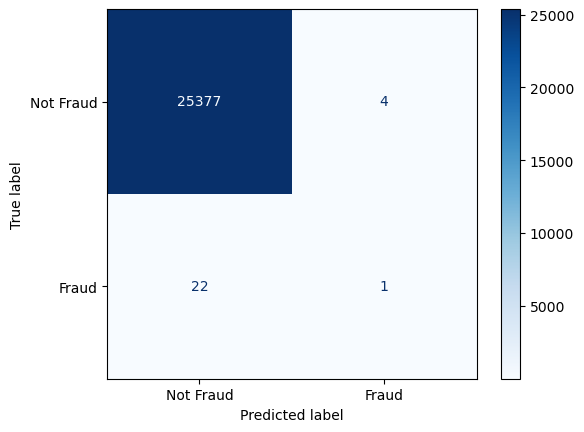

In [22]:
# Importando as biblitoecas matplotlib e sklearn

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

# Gerando dados sintéticos para classificação binária
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)

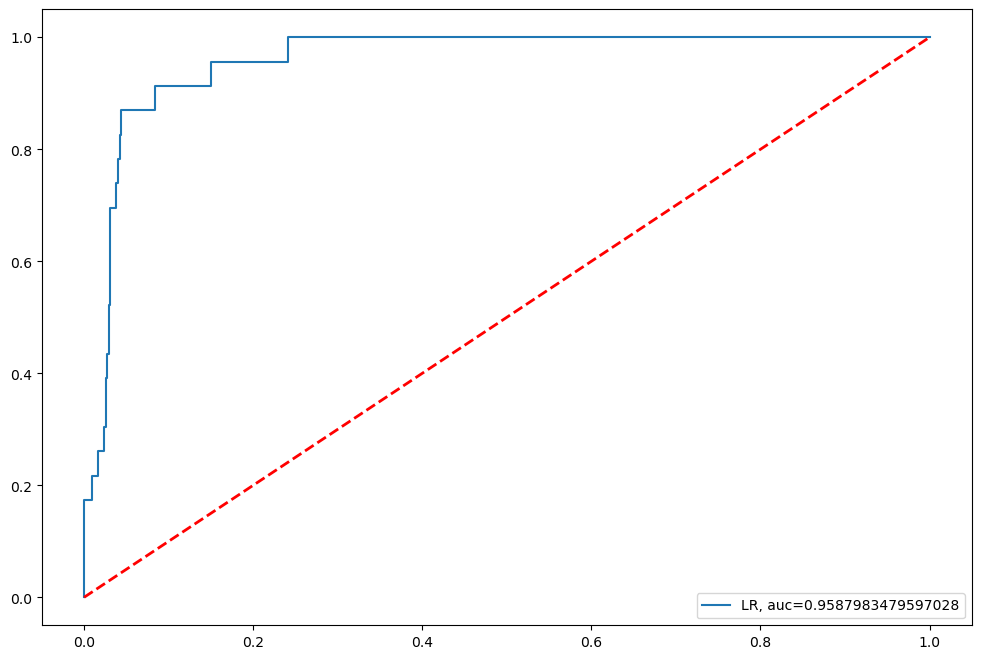

In [23]:
# Curva Roque

y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plotando a curva ROC

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

## Data balancing

In [24]:
!pip install -U imbalanced-learn

In [25]:
# Importando as bilbiotecas SMOTE e Numpy

from imblearn.over_sampling import SMOTE
import numpy as np

SEED=42

# Criando o SMOTE, um algoritimo de oversampling

smote = SMOTE(random_state=SEED)

In [26]:
# Definindo o x e y do modelo
x = df.drop('fraude', axis=1)
y = df['fraude']

In [27]:
# Função SMOTE que cria novos dados a partir da classe minoritária

x_resampled, y_resampled = smote.fit_resample(x, y)

In [28]:
# O oversampling aumenta a quantidade de valores da classe com menor quantidade de valores, fazendo com que o conjunto de dados aumente e as classes se tornem balanceadas.
df_balanced = pd.concat([y_resampled, x_resampled], axis=1)
df_balanced

fraude  tempo          valor  saldo_inicial_c1  novo_saldo_c1  \
0            0      1    9839.640000     170136.000000      160296.36   
1            0      1    1864.280000      21249.000000       19384.72   
2            1      1     181.000000        181.000000           0.00   
3            1      1     181.000000        181.000000           0.00   
4            0      1   11668.140000      41554.000000       29885.86   
...        ...    ...            ...               ...            ...   
202989       1      5   17608.962863      17608.962863           0.00   
202990       1      7   12116.291013      12116.291013           0.00   
202991       1      1  231612.880715     231612.880715           0.00   
202992       1      9  547325.144758     547325.144758           0.00   
202993       1      4  159298.594420     159298.594420           0.00   

        saldo_inicial_c2  novo_saldo_c2  tipo_CASH_IN  tipo_CASH_OUT  \
0               0.000000       0.000000             0              0   
1               0.000000       0.000000             0              0   
2               0.000000       0.000000             0              0   
3           21182.000000       0.000000             0              1   
4               0.000000       0.000000             0              0   
...                  ...            ...           ...            ...   
202989          0.000000       0.000000             0              0   
202990          0.000000       0.000000             0              0   
202991       1945.589357    9370.603471             0              0   
202992          0.000000       0.000000             0              0   
202993          0.000000       0.000000             0              0   

        tipo_DEBIT  tipo_PAYMENT  tipo_TRANSFER  
0                0             1              0  
1                0             1              0  
2                0             0              1  
3                0             0              0  
4                0             1              0  
...            ...           ...            ...  
202989           0             0              1  
202990           0             0              1  
202991           0             0              0  
202992           0             0              1  
202993           0             0              1  

[202994 rows x 12 columns]

In [29]:
df_balanced.groupby('fraude').tempo.count()

fraude
0    101497
1    101497
Name: tempo, dtype: int64

In [30]:
x = df_balanced.iloc[:, 1:].values
y = df_balanced.iloc[:, 0].values

In [31]:
# Valores balanceados vamos verificar se o modelo melhora

from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = SEED)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(max_iter=1000, random_state=SEED)

lr.fit(x_train, y_train)
y_pred =lr.predict(x_test)

print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {:.2f}'.format(metrics.f1_score(y_test, y_pred)))

Accuracy: 0.94
Precision: 0.92
Recall: 0.96
F1: 0.94


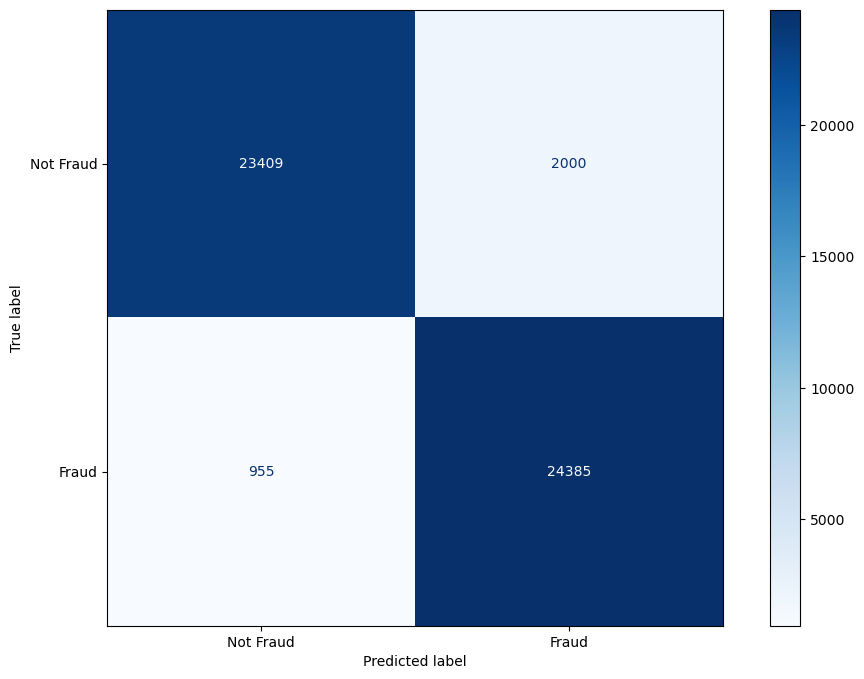

In [32]:
# Gerando dados sintéticos para classificação binária

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)

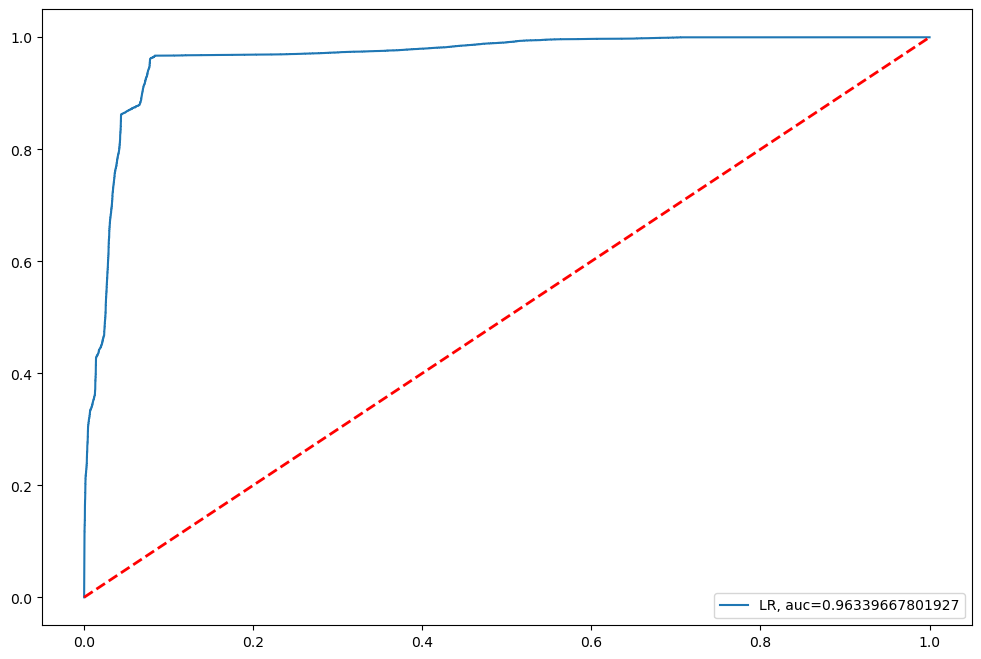

In [33]:
# Curva Roque

y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plotando a curva ROC

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

## Formulating the hypotheses

In [34]:
pandas_profiling.ProfileReport(df_balanced)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Hypotheses**
- type_PAYMENT is what the person uses by default and the fraud occurs through type_TRANSFER;
- The customer can make their payments during one period of the day and the fraud occurs during a different period, such as at dawn;
- The customer pays his bills at the beginning of the month and there was a transaction at the end of the month, which could be fraud or not.

# Analysis 4

## Decision tree

In [35]:
# Importando o algoritmo de árvore de decisão
from sklearn.tree import DecisionTreeClassifier

# Definindo o modelo
dt = DecisionTreeClassifier(max_depth= 5, random_state=SEED)

# Treinando o modelo
model = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

# Avaliando o modelo
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {:.2f}'.format(metrics.f1_score(y_test, y_pred)))

Accuracy: 0.96
Precision: 0.94
Recall: 0.99
F1: 0.96


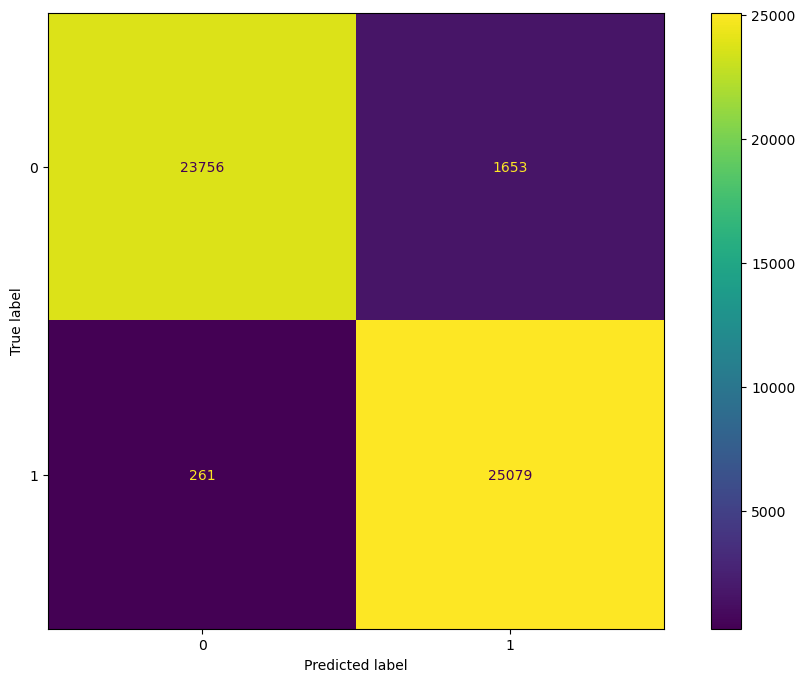

In [36]:
# Verificando a matrix de confusão

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

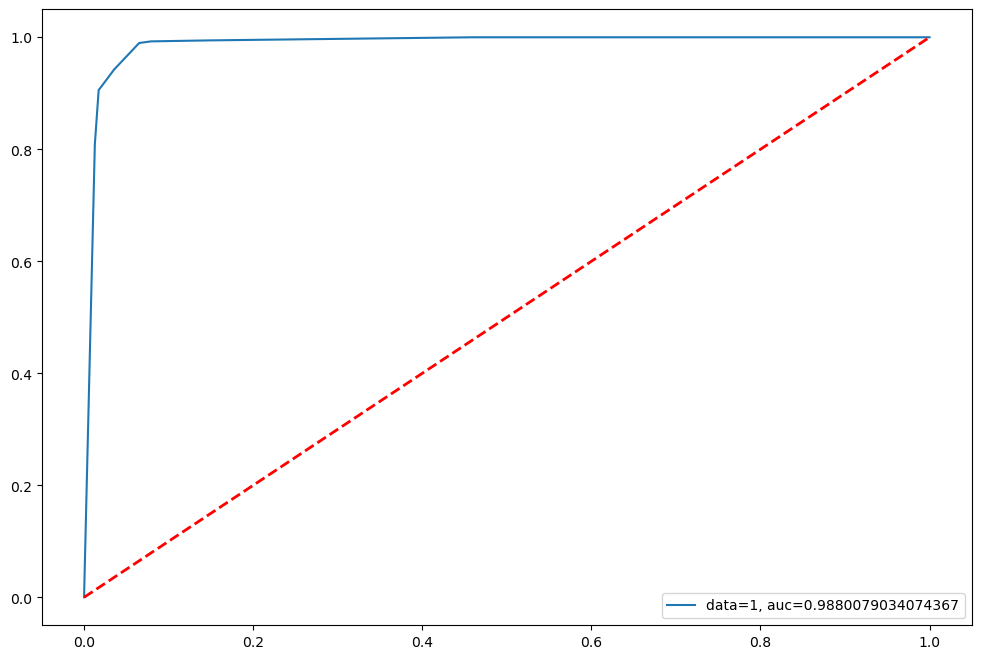

In [37]:
# Curva Roque

y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plotando a curva ROC

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="data=1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)


## Random Forest

In [38]:
# importando Random Forest

from sklearn.ensemble import RandomForestClassifier

# Criando o modelo
rf = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=SEED)

# Treinando o modelo
model = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

# Avaliando o modelo
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {:.2f}'.format(metrics.f1_score(y_test, y_pred)))

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1: 0.97


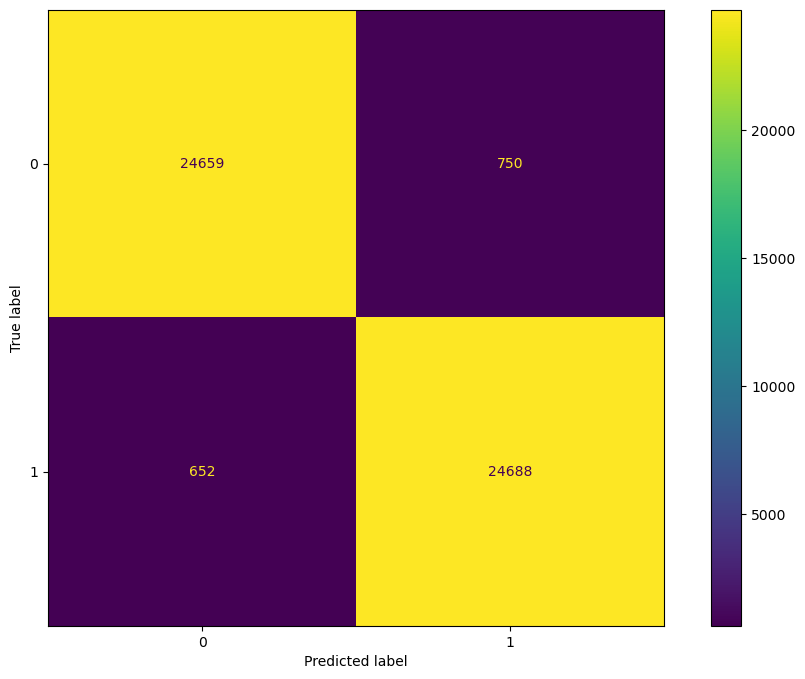

In [39]:
# Verificando a matrix de confusão

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

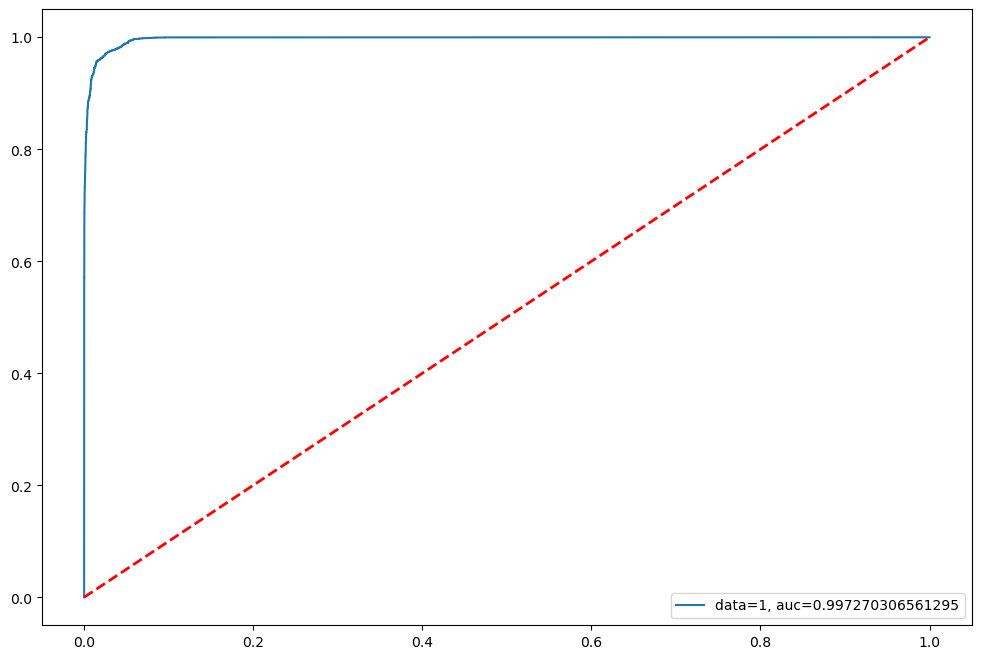

In [40]:
# Curva Roque

y_pred_proba = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plotando a curva ROC

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="data=1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

 O Random Forest utiliza várias árvores de decisão para compor o resultado final, o que geralmente torna o resultado mais preciso.

## Metrics Analysis

In [41]:
# Dicionário de classificadores

classifiers = [
    LogisticRegression(max_iter=1000, random_state=SEED),
    DecisionTreeClassifier(max_depth = 5, random_state=SEED),
    RandomForestClassifier(max_depth= 5, random_state = SEED)]


LogisticRegression
****Results****
Accuracy: 0.94
Precision: 0.92
Recall: 0.96
F1: 0.94
DecisionTreeClassifier
****Results****
Accuracy: 0.96
Precision: 0.94
Recall: 0.99
F1: 0.96
RandomForestClassifier
****Results****
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1: 0.97


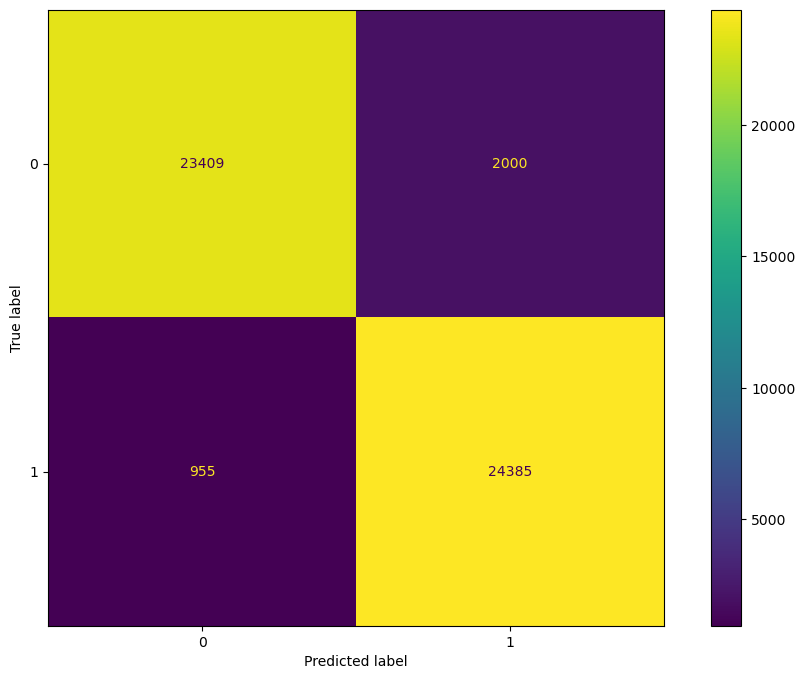

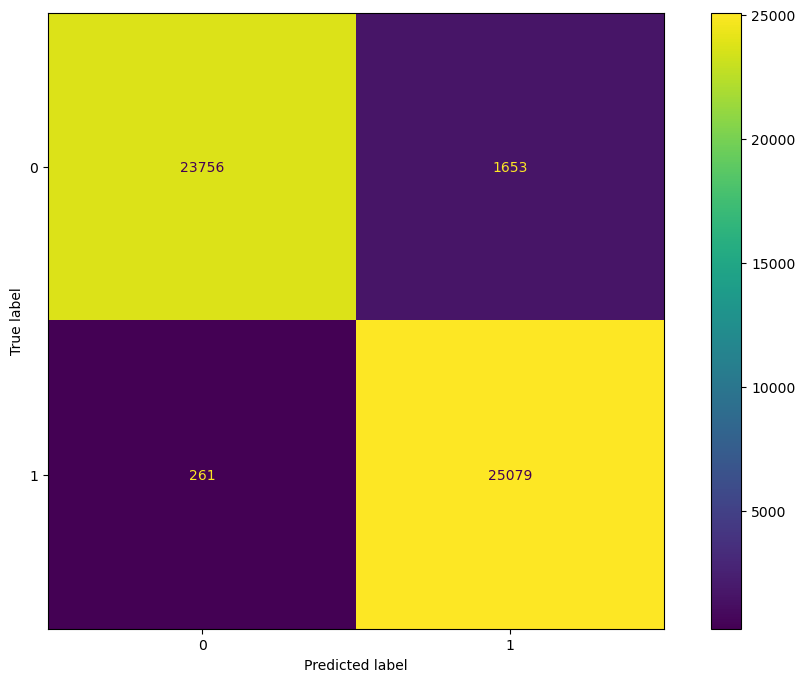

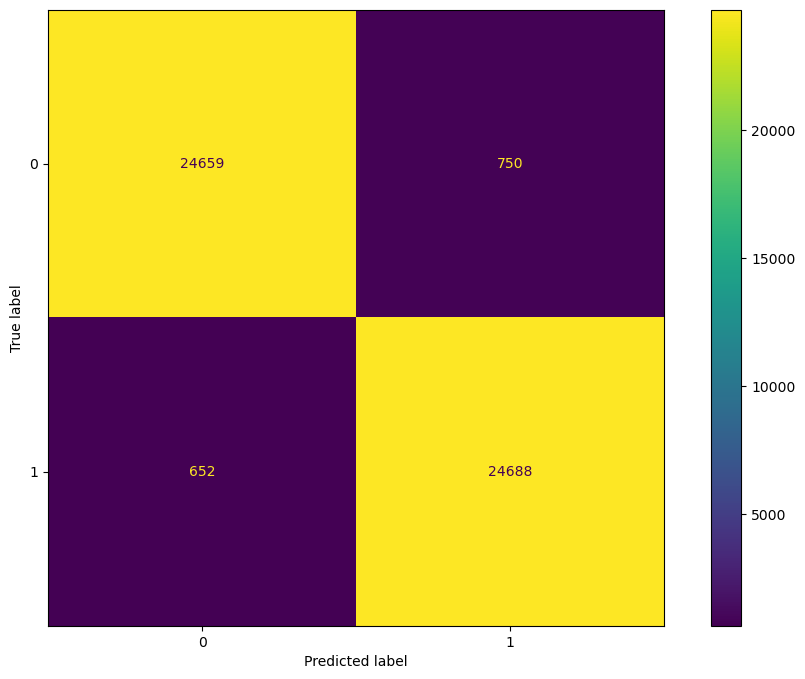

In [42]:
# Criando um classificador geral

for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print('****Results****')
    y_pred = clf.predict(x_test)
    
# Calculando a acurácia, precisão, recall e f1 para cada classificador
    
    print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))
    print('Precision: {:.2f}'.format(metrics.precision_score(y_test, y_pred)))
    print('Recall: {:.2f}'.format(metrics.recall_score(y_test, y_pred)))
    print('F1: {:.2f}'.format(metrics.f1_score(y_test, y_pred)))

# Plotando a matrix de confunsão para cada classificador
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()


O recall é a métrica mais importante para algoritmos de detecção de fraude, uma vez que é muito mais problemático não classificar corretamente as pessoas que estão cometendo fraude, o que pode gerar um grande prejuízo.

# Analysis 5

## Improving the model

In [43]:
# Definindo os hiperparâmetros do modelo

n_estimators = np.arange(20, 200, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(2, 10, step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [44]:
# Dicionário para facilitar a leitura dos dados no RandomizedSearchCV

param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [45]:
# Importando o RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

SEED = 70

rforest = RandomForestClassifier(random_state=SEED)

In [46]:
# Definindo os parâmetros de entrada

random_cv = RandomizedSearchCV(
    rforest, param_grid, n_iter = 5, cv = 3, scoring="recall", n_jobs=-1, random_state=SEED
)

In [50]:
%%time
rcv = random_cv.fit(x_train, y_train)


Wall time: 34.7 s


In [51]:
pd.DataFrame(rcv.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      17.030760      0.251175         0.330953        0.004841   
1       7.947598      0.069529         0.336866        0.008042   
2       8.777690      0.033381         0.149949        0.004174   
3      14.149890      0.074254         0.299416        0.003762   
4      10.061661      0.068336         0.364751        0.006086   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                120                       4                      2   
1                120                       4                      2   
2                 40                       8                      1   
3                100                       8                      4   
4                160                       6                      2   

  param_max_features param_max_depth param_criterion param_bootstrap  \
0               auto               9            gini           False   
1               auto               2            gini           False   
2               sqrt               7         entropy           False   
3               log2               9         entropy            True   
4               log2               2            gini           False   

                                              params  split0_test_score  \
0  {'n_estimators': 120, 'min_samples_split': 4, ...           0.995194   
1  {'n_estimators': 120, 'min_samples_split': 4, ...           0.857796   
2  {'n_estimators': 40, 'min_samples_split': 8, '...           0.973765   
3  {'n_estimators': 100, 'min_samples_split': 8, ...           0.993028   
4  {'n_estimators': 160, 'min_samples_split': 6, ...           0.857953   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.994839           0.994406         0.994813        0.000322   
1           0.860193           0.861892         0.859960        0.001681   
2           0.974355           0.975223         0.974448        0.000599   
3           0.993697           0.992082         0.992936        0.000662   
4           0.861217           0.862798         0.860656        0.002017   

   rank_test_score  
0                1  
1                5  
2                3  
3                2  
4                4

In [53]:
# Verificando quais foram os melhores parâmetros

rcv.best_params_

{'n_estimators': 120,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'gini',
 'bootstrap': False}

## Final results

In [57]:
# Random Forest Classifier Otimizado

rfn = RandomForestClassifier(**rcv.best_params_, random_state = SEED)

model = rfn.fit(x_train, y_train)
y_pred = rfn.predict(x_test)


In [58]:
# Calculando a acurácia, precisão, recall e f1 para cada classificador
    
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {:.2f}'.format(metrics.f1_score(y_test, y_pred)))

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1: 0.99


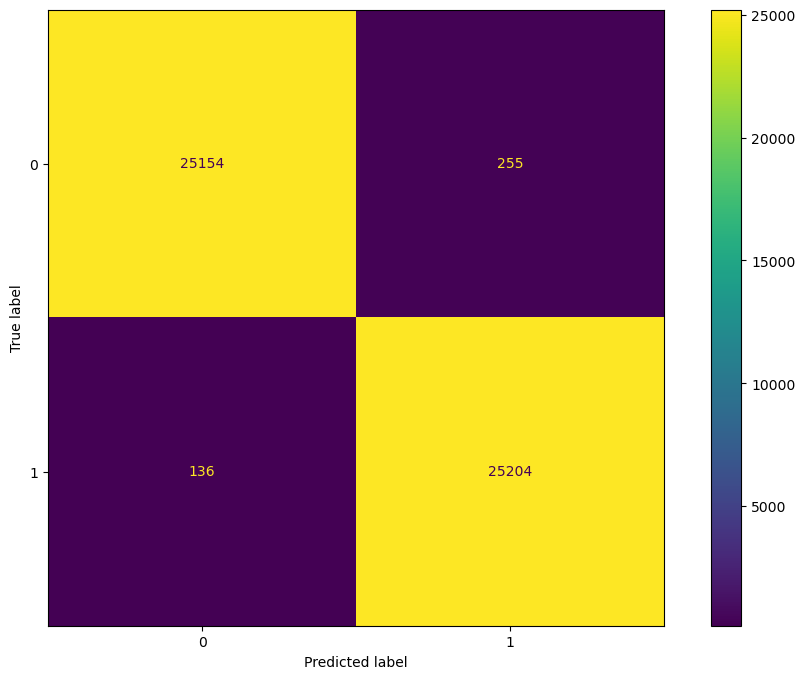

In [59]:
# Verificando a matrix de confusão

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Conclusion

**Hypothesis**

• The customer has a certain pattern of money movement, during business hours, and the fraud occurred outside these hours, such as during the night.

• Still in terms of time, the customer can make their main movements in the beginning of the month and the fraud was seen on an unusual day.

Possible solution:

   - Make a CAPTCHA to increase security at unconventional times.

• The customer defaults to payment in cash, either by PIX or withdrawal*, and fraud can occur through payment by transfer

Possible solution:

   - Request additional information verification from the bank, such as a security question, for transfer movements.